### <center> PDL Lab15: Text dataset creation and design of Simple RNN for Sentiment Analysis</center>

NAME: NAMBIRAJAN R S<BR>Roll No: 215229125

### 1. Import libraries

In [59]:
import csv
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Embedding,SimpleRNN

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\2mscdsa25\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [6]:
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))

### 2. Creation of data

In [19]:
df = pd.read_csv("senti-dataset.csv",encoding="ISO-8859-1")

In [20]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,I thought this was a wonderful way to spend ti...,1
2,Encouraged by the positive comments about this...,0
3,I like this movie,1
4,This movie was so bored,0


### 3. Opening your CSV file

In [21]:
import csv

In [22]:
file = open('senti-dataset.csv')

type(file)

_io.TextIOWrapper

In [23]:
csvreader = csv.reader(file)

In [24]:
header = []
header = next(csvreader)
header

['review', 'sentiment']

In [25]:
rows = []
for row in csvreader:
        rows.append(row)
rows

[["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked.",
  '1'],
 ['I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the theater',
  '1'],
 ['Encouraged by the positive comments about this film on here I was looking forward to watching this',
  '0'],
 ['I like this movie', '1'],
 ['This movie was so bored', '0'],
 ["I'm not big fan of this movie", '0'],
 ['This movie made it into one of my top 10 most awful movies. Horrible.',
  '0'],
 ['I remember this film,it was the first film i had watched at the cinema the picture was dark in place',
  '1'],
 ['An awful film!', '0'],
 ['What an absolutely stunning movie', '1'],
 ["'War movie' is a Hollywood genre that has been done and redone so many times that clichéd dialogue",
  '1'],
 ['"sita ram" is one of the finest film ever made in Indian Cinema.', '1'],
 ["Okay, so this series kind of takes the route of 'here we go again!'", '1'],
 ["As a disclaimer, I've

In [26]:
file.close()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     20 non-null     object
 1   sentiment  20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 448.0+ bytes


### 4. Pre-processing the text

In [28]:
df['sentiment'].value_counts()

1    10
0    10
Name: sentiment, dtype: int64

In [34]:
y = df['sentiment']
X=df['review']

### 5. Dataset Preparation

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3)

In [37]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(14,)
(6,)
(14,)
(6,)


In [38]:
# 4th step to be continue
train_token = Tokenizer(num_words=100,oov_token='<oov>')
train_token.fit_on_texts(X_train)
word_index = train_token.word_index
train_sequence = train_token.texts_to_sequences(X_train)
dict(list(word_index.items())[0:10])

{'<oov>': 1,
 'a': 2,
 'this': 3,
 'movie': 4,
 'the': 5,
 'of': 6,
 'film': 7,
 'i': 8,
 'and': 9,
 'so': 10}

In [39]:
vocab = len(train_token.word_index) + 1
vocab

99

In [40]:
train_sequence[3]

[15, 14, 7]

In [41]:
train_padded = pad_sequences(train_sequence,maxlen=100,padding='post')

In [42]:
train_padded[5]

array([47, 10,  3, 48, 49,  6, 50,  5, 51,  6, 52, 16, 53, 54, 55,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [43]:
train_padded.shape

(14, 100)

In [44]:
val_token = Tokenizer(num_words=500,oov_token='<oov>')
val_token.fit_on_texts(X_val)
val_index = val_token.word_index
val_sequence = val_token.texts_to_sequences(X_val)

In [48]:
val_sequence[4]

[48, 2, 49, 4, 50, 3, 2, 51]

In [49]:
val_padded = pad_sequences(val_sequence,maxlen=100,padding='post')

In [50]:
val_padded[4]

array([48,  2, 49,  4, 50,  3,  2, 51,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

### 6. Model Creation

In [53]:
model = Sequential()
# Embedding layer
model.add(Embedding(300,70,input_length=100))
model.add(SimpleRNN(70,activation='relu'))
model.add(Dense('1',activation='sigmoid'))

In [54]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 70)           21000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 70)                9870      
                                                                 
 dense (Dense)               (None, 1)                 71        
                                                                 
Total params: 30,941
Trainable params: 30,941
Non-trainable params: 0
_________________________________________________________________


In [56]:
history=model.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)

Epoch 1/10
1/1 - 1s - loss: 0.6938 - accuracy: 0.5000 - 707ms/epoch - 707ms/step
Epoch 2/10
1/1 - 0s - loss: 0.6933 - accuracy: 0.5000 - 15ms/epoch - 15ms/step
Epoch 3/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 11ms/epoch - 11ms/step
Epoch 4/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 9ms/epoch - 9ms/step
Epoch 5/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 8ms/epoch - 8ms/step
Epoch 6/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 9ms/epoch - 9ms/step
Epoch 7/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 8ms/epoch - 8ms/step
Epoch 8/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 8ms/epoch - 8ms/step
Epoch 9/10
1/1 - 0s - loss: 0.6931 - accuracy: 0.5000 - 8ms/epoch - 8ms/step
Epoch 10/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 7ms/epoch - 7ms/step


In [57]:
model.evaluate(val_padded,y_val)

1/1 [==============================] - 0s 272ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931697726249695, 0.5]

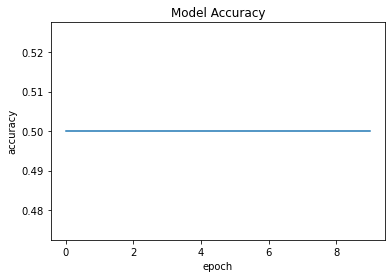

In [60]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

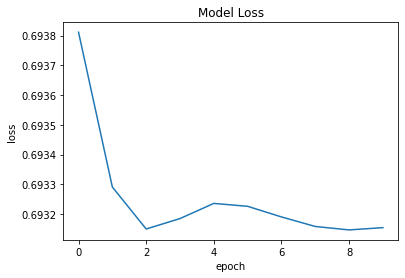

In [61]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [62]:
text = df["review"]

In [63]:
#sent = [w.lower() for w in text.split() if not w in STOPWORDS]
trail_token = Tokenizer()
trail_token.fit_on_texts(text)
#word_index = trail_token.word_index
trail_seq = trail_token.texts_to_sequences(text)
#dict(list(word_index.items())[0:10])
trail_pad = pad_sequences(trail_seq,maxlen=100,padding='post')

In [64]:
trail_pad

array([[ 10,   4,   1, ...,   0,   0,   0],
       [  6,  43,   2, ...,   0,   0,   0],
       [ 54,  55,   1, ...,   0,   0,   0],
       ...,
       [ 19,   3, 132, ...,   0,   0,   0],
       [133,  32,  23, ...,   0,   0,   0],
       [  3, 138, 139, ...,   0,   0,   0]])

In [65]:
res = model.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

1/1 [==============================] - 0s 115ms/step
[[0.50335705]
 [0.50335705]
 [0.50335705]
 [0.50335705]
 [0.50335705]
 [0.50335705]
 [0.50335705]
 [0.50335705]
 [0.50335705]
 [0.50335705]
 [0.50335705]
 [0.50335705]
 [0.50335705]
 [0.50335705]
 [0.50335705]
 [0.50335705]
 [0.50335705]
 [0.50335705]
 [0.50335705]
 [0.50335705]] negative


C:\Users\2mscdsa25\AppData\Local\Temp\ipykernel_6276\1535703611.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(res,label[np.argmax(trail_pad)>50])


### Model 2

In [66]:
model1 = Sequential()
# Embedding layer
model1.add(Embedding(5000,64,input_length=100))
model1.add(SimpleRNN(32,activation='tanh'))
model1.add(Embedding(5000,32,input_length=100))
model1.add(SimpleRNN(32,activation='tanh' ))
model1.add(Dense('1',activation='sigmoid'))

In [67]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 embedding_2 (Embedding)     (None, 32, 32)            160000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 485,217
Trainable params: 485,217
Non-trainable params: 0
_________________________________________________________________


In [68]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
history1=model1.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)

Epoch 1/10
1/1 - 1s - loss: 0.7023 - accuracy: 0.5000 - 718ms/epoch - 718ms/step
Epoch 2/10
1/1 - 0s - loss: 0.6942 - accuracy: 0.5000 - 6ms/epoch - 6ms/step
Epoch 3/10
1/1 - 0s - loss: 0.6934 - accuracy: 0.5000 - 7ms/epoch - 7ms/step
Epoch 4/10
1/1 - 0s - loss: 0.6947 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
Epoch 5/10
1/1 - 0s - loss: 0.6950 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
Epoch 6/10
1/1 - 0s - loss: 0.6945 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
Epoch 7/10
1/1 - 0s - loss: 0.6939 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
Epoch 8/10
1/1 - 0s - loss: 0.6934 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
Epoch 9/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 5ms/epoch - 5ms/step
Epoch 10/10
1/1 - 0s - loss: 0.6931 - accuracy: 0.5000 - 5ms/epoch - 5ms/step


In [70]:
model1.evaluate(val_padded,y_val)

1/1 [==============================] - 0s 185ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932070851325989, 0.5]

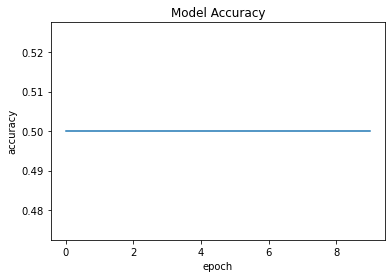

In [71]:
plt.plot(history1.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

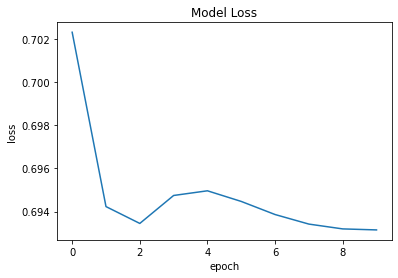

In [72]:
plt.plot(history1.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [73]:
res = model1.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

1/1 [==============================] - 0s 151ms/step
[[0.5054742]
 [0.5054742]
 [0.5054742]
 [0.5054742]
 [0.5054742]
 [0.5054742]
 [0.5054742]
 [0.5054742]
 [0.5054742]
 [0.5054742]
 [0.5054742]
 [0.5054742]
 [0.5054742]
 [0.5054742]
 [0.5054742]
 [0.5054742]
 [0.5054742]
 [0.5054742]
 [0.5054742]
 [0.5054742]] negative


C:\Users\2mscdsa25\AppData\Local\Temp\ipykernel_6276\2701450631.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(res,label[np.argmax(trail_pad)>50])


### Model 3

In [74]:
model2 = Sequential()
# Embedding layer
model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='tanh'))
model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='relu' ))
model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='tanh' ))
model2.add(Dense('1',activation='sigmoid'))

In [75]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 128)          512000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 64)                12352     
                                                                 
 embedding_4 (Embedding)     (None, 64, 128)           512000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 64)                12352     
                                                                 
 embedding_5 (Embedding)     (None, 64, 128)           512000    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense_2 (Dense)             (None, 1)                

In [76]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [77]:
history2=model2.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)

Epoch 1/10
1/1 - 1s - loss: 0.6932 - accuracy: 0.5000 - 956ms/epoch - 956ms/step
Epoch 2/10
1/1 - 0s - loss: 0.7024 - accuracy: 0.5000 - 11ms/epoch - 11ms/step
Epoch 3/10
1/1 - 0s - loss: 0.6939 - accuracy: 0.5000 - 11ms/epoch - 11ms/step
Epoch 4/10
1/1 - 0s - loss: 0.6941 - accuracy: 0.5000 - 11ms/epoch - 11ms/step
Epoch 5/10
1/1 - 0s - loss: 0.6955 - accuracy: 0.5000 - 10ms/epoch - 10ms/step
Epoch 6/10
1/1 - 0s - loss: 0.6943 - accuracy: 0.5000 - 10ms/epoch - 10ms/step
Epoch 7/10
1/1 - 0s - loss: 0.6933 - accuracy: 0.5000 - 11ms/epoch - 11ms/step
Epoch 8/10
1/1 - 0s - loss: 0.6932 - accuracy: 0.5000 - 11ms/epoch - 11ms/step
Epoch 9/10
1/1 - 0s - loss: 0.6934 - accuracy: 0.5000 - 13ms/epoch - 13ms/step
Epoch 10/10
1/1 - 0s - loss: 0.6933 - accuracy: 0.5000 - 12ms/epoch - 12ms/step


In [78]:
model2.evaluate(val_padded,y_val)

1/1 [==============================] - 0s 248ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931471824645996, 0.5]

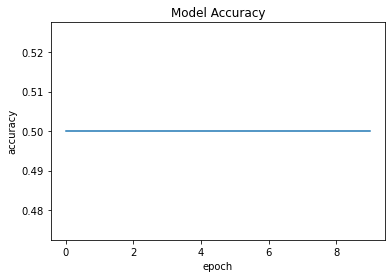

In [79]:
plt.plot(history2.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

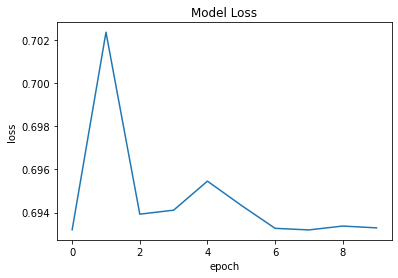

In [80]:
plt.plot(history2.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [81]:
res = model2.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

1/1 [==============================] - 0s 213ms/step
[[0.49996203]
 [0.49996203]
 [0.49996203]
 [0.49996203]
 [0.49996203]
 [0.49996203]
 [0.49996203]
 [0.49996203]
 [0.49996203]
 [0.49996203]
 [0.49996203]
 [0.49996203]
 [0.49996203]
 [0.49996203]
 [0.49996203]
 [0.49996203]
 [0.49996203]
 [0.49996203]
 [0.499962  ]
 [0.499962  ]] negative


C:\Users\2mscdsa25\AppData\Local\Temp\ipykernel_6276\479605851.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(res,label[np.argmax(trail_pad)>50])
